# Problem Statement

The goal of this project is to develop a Machine Learning-based Flight Price Prediction System capable of estimating the ticket price for domestic flight routes in India based on historical flight data.

The objective is to analyze the dataset, extract meaningful patterns, engineer new features, and build predictive models that accurately estimate flight ticket prices based on given input conditions. By transforming date-time attributes, analyzing travel duration, and converting categorical variables into meaningful numerical features, the model aims to understand the relationship between flight characteristics and pricing strategies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data_Train.csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis

* Price is the target variable
* And the columns like airline, date of journey, route,source and destination etc are the input variable.
* Basically, the dataset tells about the price of the flight for different airlines.
* Also, except price, every column is categorical column.

# Basic Checks

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.shape

(10683, 11)

In [9]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.value_counts('Airline')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [12]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [13]:
data.value_counts('Route')

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? IXZ ? MAA ? BLR       1
CCU ? RPR ? HYD ? BLR       1
CCU ? IXA ? BLR             1
CCU ? IXB ? DEL ? BLR       1
CCU ? VTZ ? BLR             1
Name: count, Length: 128, dtype: int64

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Insights

* The average price of flight is 9087.064121
* The price range is between 1759 to 79512 which seems that flight price is very cheaper as well as very very costly.


# Data Preprocessing

In [16]:
def convert_duration_to_minutes(x):
    x = x.strip()
    hours = 0
    minutes = 0
    
    # If it has hours
    if "h" in x:
        hours = int(x.split("h")[0].strip())
        x = x.split("h")[1].strip()
    
    # If it has minutes
    if "m" in x and x != "":
        minutes = int(x.replace("m", "").strip())
    
    return hours * 60 + minutes

# Apply conversion
data["Duration_mins"] = data["Duration"].apply(convert_duration_to_minutes)

# Check result
data[["Duration", "Duration_mins"]].head()


,Duration,Duration_mins
0,2h 50m,170
1,7h 25m,445
2,19h,1140
3,5h 25m,325
4,4h 45m,285


In [17]:
# Now,we can drop the duration columns as we have the minutes columns.
data.drop(['Duration'],axis=1,inplace=True)

In [18]:
data['Date'] = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year'] = data['Date_of_Journey'].str.split('/').str[2]
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [19]:
data.drop(['Date_of_Journey'],axis = 1,inplace=True)

In [20]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_mins,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,170,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,1140,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,325,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,285,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,non-stop,No info,4107,150,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,non-stop,No info,4145,155,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,non-stop,No info,7229,180,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,non-stop,No info,12648,160,1,3,2019


In [21]:
# The 'Arrival Time' column contains both time and date information, such as "1:15 PM 22nd March".
# We only need the time portion for modeling.

data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])
data['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [22]:
data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1]

In [23]:
data['Arrival_hour'] = data['Arrival_hour'].astype(int)
data['Arrival_min'] = data['Arrival_hour'].astype(int)

In [24]:
# Similarly, for the 'Departure Time' column, we split the time string on ':' to extract dep_hour and Dep_min.
# Then these are converted to integers.

data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0]
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1]
data['Dep_hour'] = data['Dep_hour'].astype(int)
data['Dep_min'] = data['Dep_min'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Duration_mins    10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
 15  Dep_hour         10683 non-null  int64 
 16  Dep_min          10683 non-null  int64 
dtypes: int64(9), object(8)
memory u

In [26]:
# The 'Total Stops' feature contains categorical values such as 
# 'non-stop', '1 stop', '2 stops', '3 stops', and some missing values (NaN).

data['Total_Stops'].unique().tolist()

['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']

In [27]:
data['Total_Stops'].isnull().sum()

np.int64(1)

In [28]:
# as we have only one nan value in Total Stop
# then we replace with mode value

pd.DataFrame(data['Total_Stops']).value_counts()

Total_Stops
1 stop         5625
non-stop       3491
2 stops        1520
3 stops          45
4 stops           1
Name: count, dtype: int64

In [29]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [30]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_mins,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min


In [31]:
# null values has been handled

In [32]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_mins,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,0,No info,3897,170,24,3,2019,1,1,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2,No info,7662,445,1,5,2019,13,13,5,50


In [33]:
data['Total_Stops'].dtype

dtype('int64')

In [34]:
data.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [35]:
data.duplicated().sum()

np.int64(222)

In [36]:
data.shape

(10683, 15)

In [37]:
# as we can see that we total 222 duplicatedd values in the dataset 
# so we'll have to remove this for better model prediction.


data = data.drop_duplicates().reset_index(drop=True)

In [38]:
data.shape

(10461, 15)

In [39]:
data.head(3).T

,0,1,2
Airline,IndiGo,Air India,Jet Airways
Source,Banglore,Kolkata,Delhi
Destination,New Delhi,Banglore,Cochin
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK
Total_Stops,0,2,2
Additional_Info,No info,No info,No info
Price,3897,7662,13882
Duration_mins,170,445,1140
Date,24,1,9
Month,3,5,6


# Exploratory Data Analysis

In [40]:
stops_summary = data.groupby('Total_Stops')['Price'].agg(['count','mean','median','std']).round(2)
display(stops_summary)

,count,mean,median,std
Total_Stops,,,,
0,3473,5017.92,4667.0,2078.30
1,5626,10593.57,10262.0,4281.47
2,1318,12761.10,12723.0,3529.84
3,43,13260.67,13007.0,2942.81
4,1,17686.00,17686.0,NaN


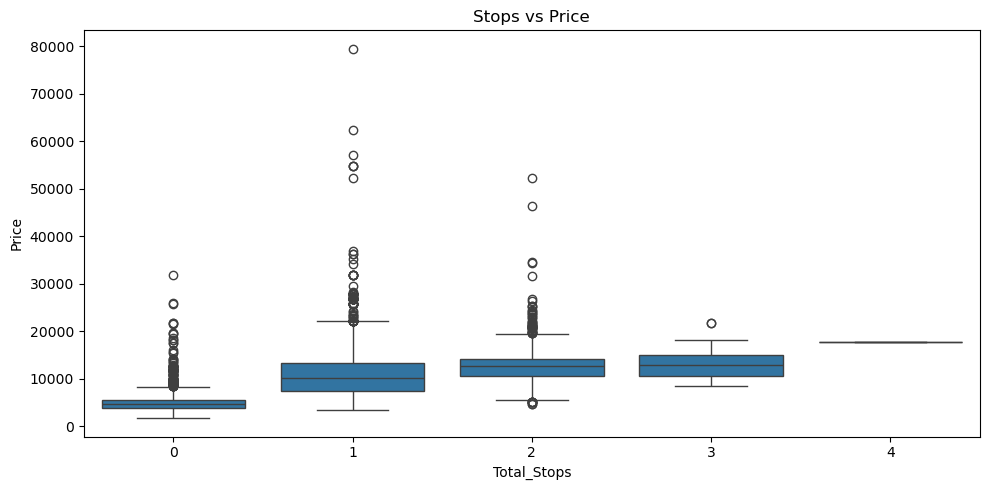

In [41]:
# Stops vs Price

plt.figure(figsize=(10,5))
sns.boxplot(data = data,x=data.Total_Stops,y=data.Price)
plt.title("Stops vs Price")
plt.tight_layout()
plt.show()

# Insights:-

* Direct Flight (0 stops) are significantly cheaper with a median price of 4667 compared to 10262 for 1 flights and other flights.

* The most of the flights are direct or single stops seems the most popular travel option.

* There are outliers across all the stop categories, suggesting that addditional factores such as airline, route complexity and timing also influence pricing.

* The number of stops serves as a high price predictor, with direct flights consistently offering the most cost-effective option for travelers.

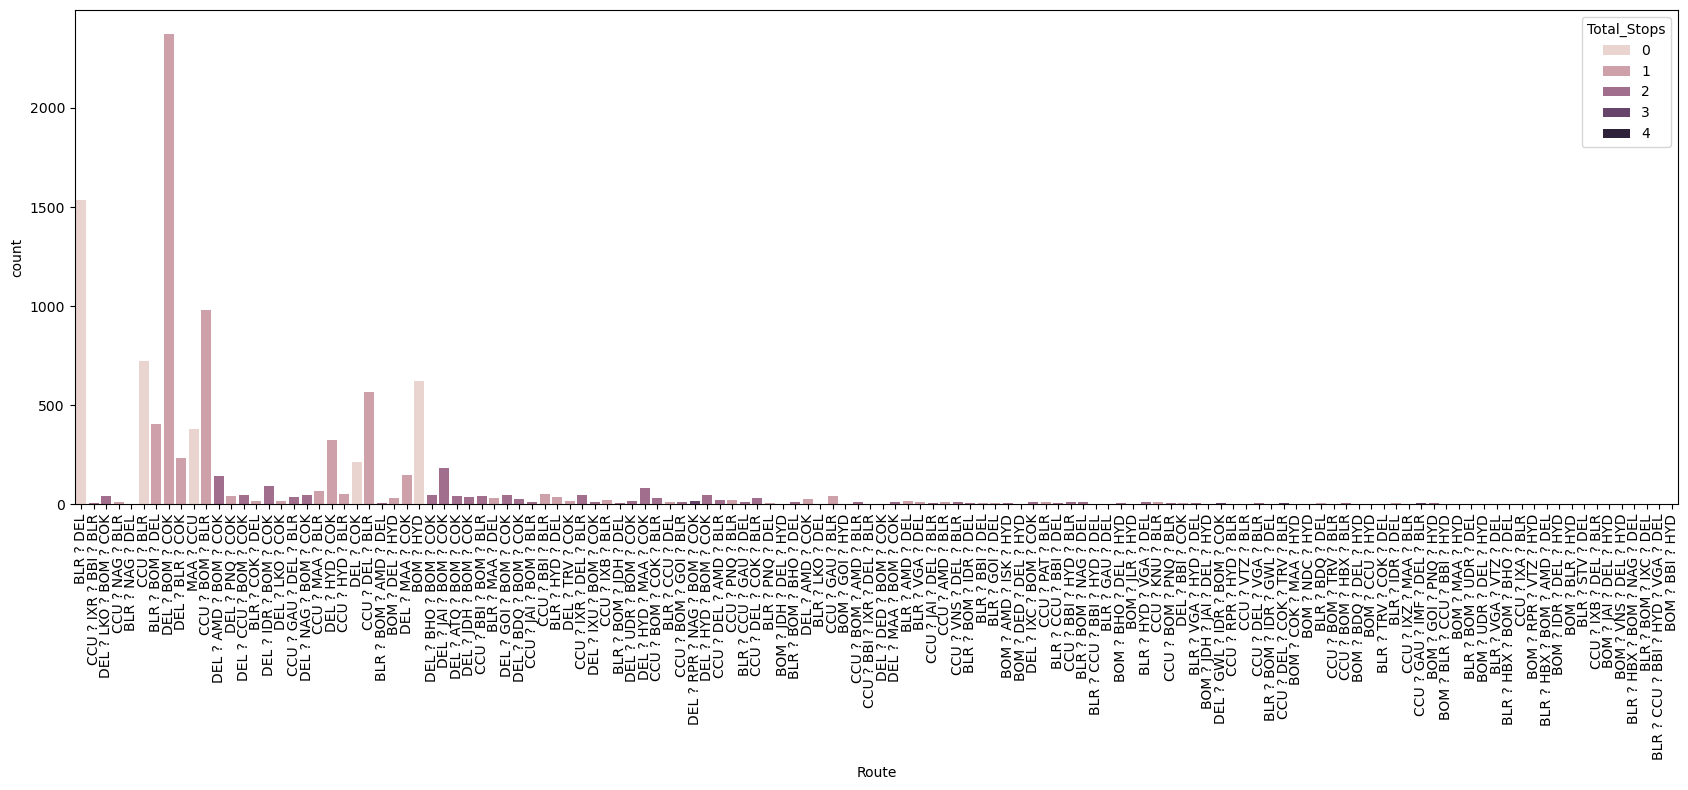

In [42]:
## Route vs Total Stop
plt.figure(figsize=(17,8))
sns.countplot(x=data.Route,hue=data.Total_Stops)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Route')
plt.show()

<Axes: xlabel='Duration_mins', ylabel='Price'>

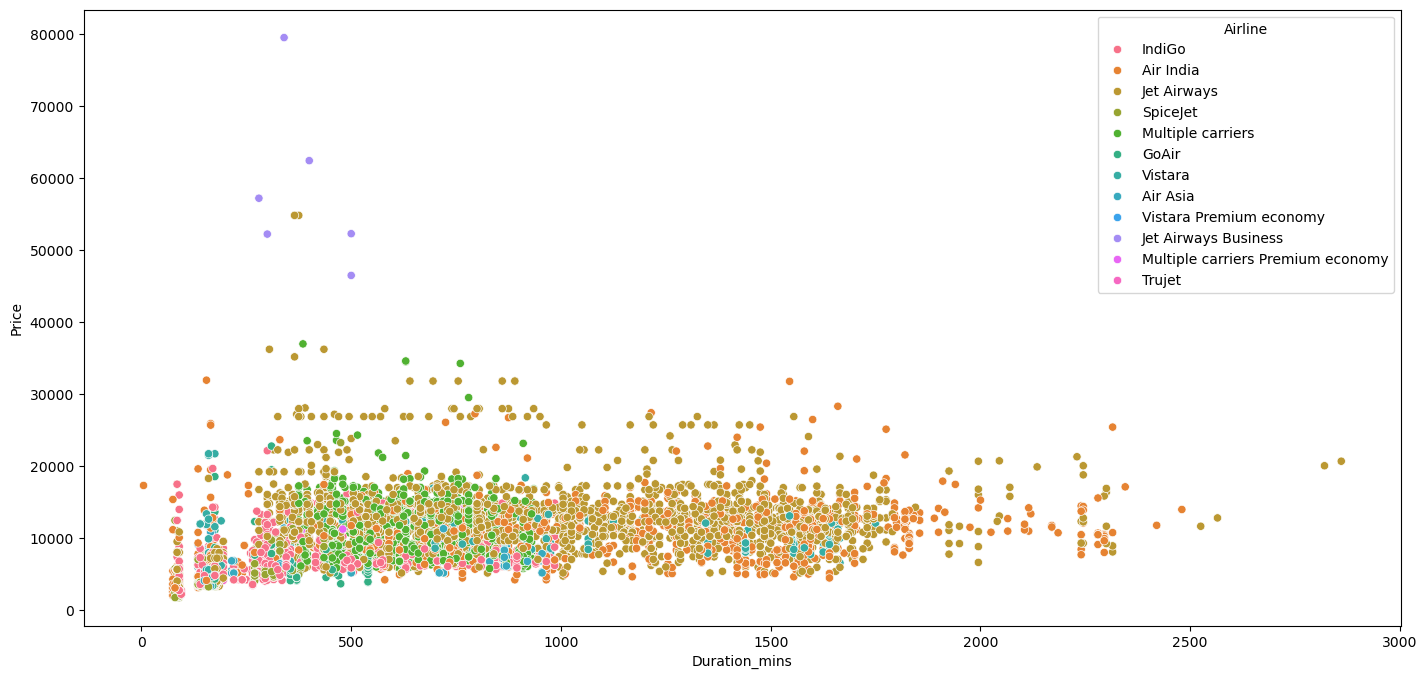

In [43]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=data, x='Duration_mins', y='Price',hue='Airline')

* When colored by airline, the scatterplot reveals significant airline-based price clustering.
* Jet Airways Business and premium carriers consistently occupy the upper price ranges across all durations,

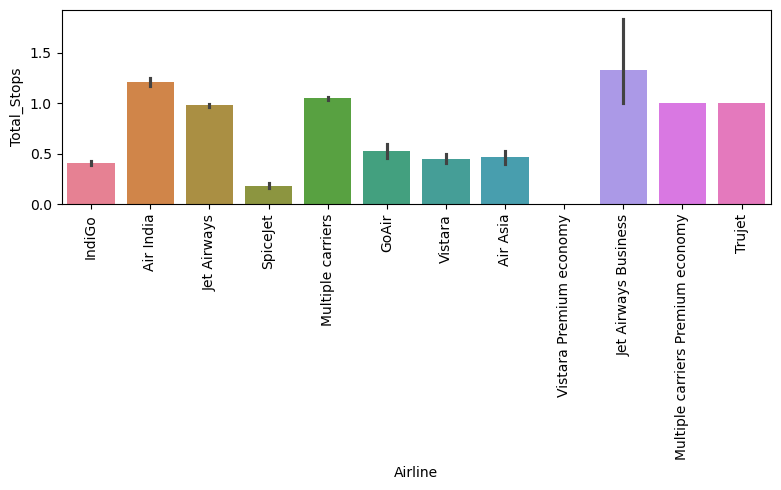

In [44]:
## Airlines vs Total_Stops
plt.figure(figsize=(8,5))
sns.barplot(x=data.Airline,y=data.Total_Stops,hue=data.Airline)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

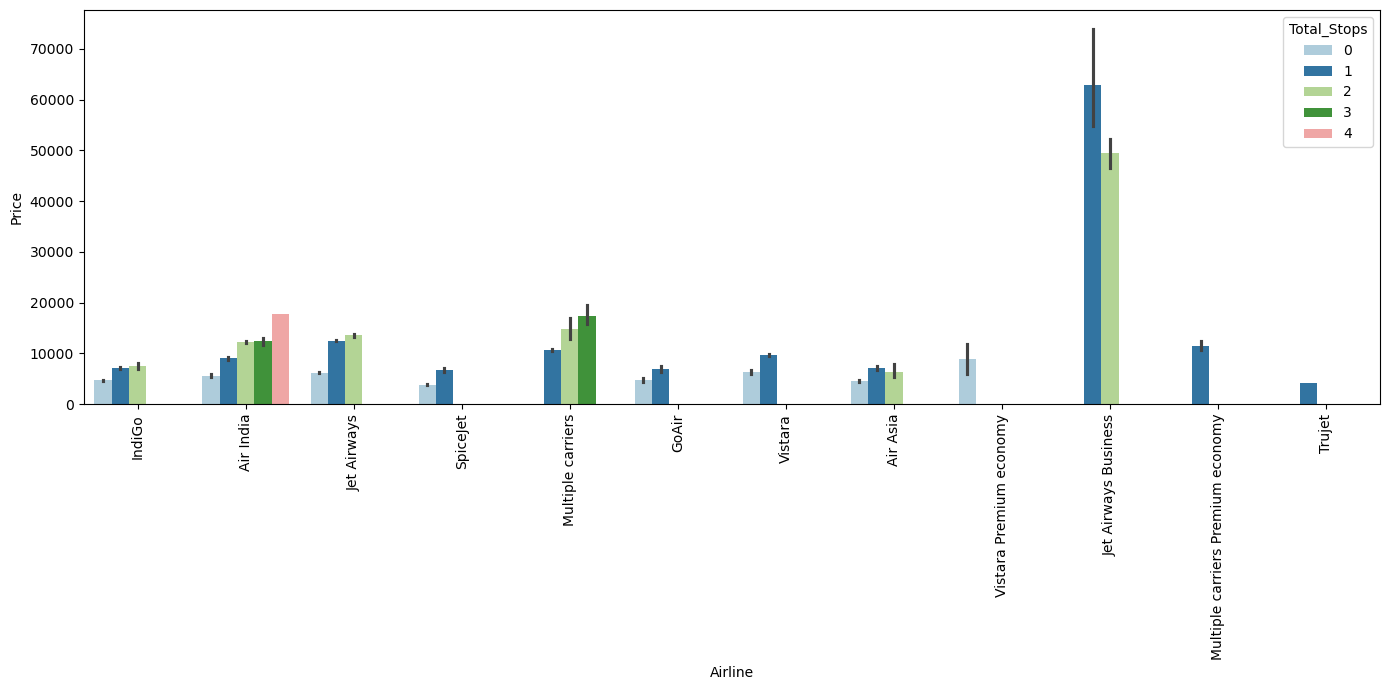

In [45]:
plt.figure(figsize=(14,7))
sns.barplot(x=data.Airline,y=data.Price,hue=data.Total_Stops,palette='Paired')
plt.xticks(ha='center',rotation = 90)
plt.tight_layout()

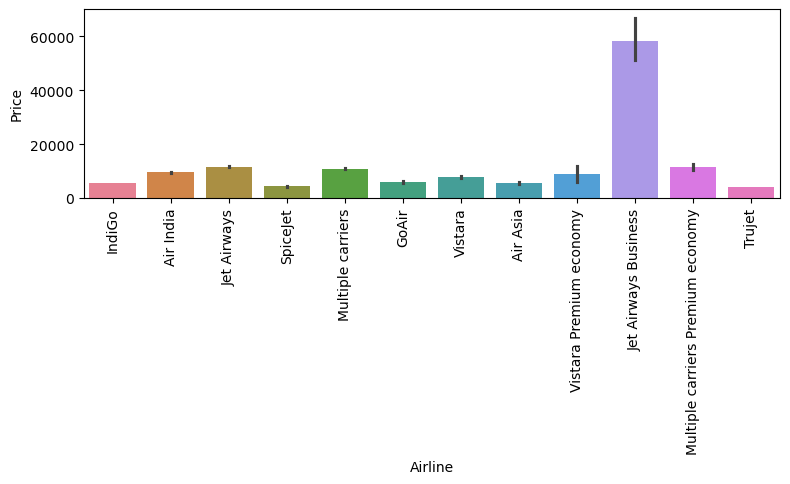

In [46]:
## Airlines vs Price
plt.figure(figsize=(8,5))
sns.barplot(x=data.Airline,y=data.Price,hue=data.Airline)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
## Now, all visualization done ...
## then drop the route column because it is not neccessary to keep 

data.drop(['Route'],inplace=True,axis=1)
data.drop(['Additional_Info'],axis=1,inplace=True)

In [48]:
# create a dummy columns of Airline
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [49]:
# create a dummy columns of Source
Source = data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [50]:
# create a dummy columns of Destination
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [51]:
data = pd.concat([data,Airline,Source,Destination],axis=1)

In [52]:
data

,Airline,Source,Destination,Total_Stops,Price,Duration_mins,Date,Month,Year,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,170,24,3,2019,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,445,1,5,2019,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,1140,9,6,2019,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,325,12,5,2019,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,285,1,3,2019,21,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,Air Asia,Kolkata,Banglore,0,4107,150,9,4,2019,22,...,False,False,False,True,False,False,False,False,False,False
10457,Air India,Kolkata,Banglore,0,4145,155,27,4,2019,23,...,False,False,False,True,False,False,False,False,False,False
10458,Jet Airways,Banglore,Delhi,0,7229,180,27,4,2019,11,...,False,False,False,False,False,False,True,False,False,False
10459,Vistara,Banglore,New Delhi,0,12648,160,1,3,2019,14,...,False,False,False,False,False,False,False,False,False,True


In [53]:
data.drop(["Airline",'Source',"Destination"],axis=1,inplace=True)#droping

In [54]:
data

,Total_Stops,Price,Duration_mins,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,170,24,3,2019,1,1,22,20,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,445,1,5,2019,13,13,5,50,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,1140,9,6,2019,4,4,9,25,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,325,12,5,2019,23,23,18,5,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,285,1,3,2019,21,21,16,50,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,0,4107,150,9,4,2019,22,22,19,55,...,False,False,False,True,False,False,False,False,False,False
10457,0,4145,155,27,4,2019,23,23,20,45,...,False,False,False,True,False,False,False,False,False,False
10458,0,7229,180,27,4,2019,11,11,8,20,...,False,False,False,False,False,False,True,False,False,False
10459,0,12648,160,1,3,2019,14,14,11,30,...,False,False,False,False,False,False,False,False,False,True


# Feature Engineering

<Axes: >

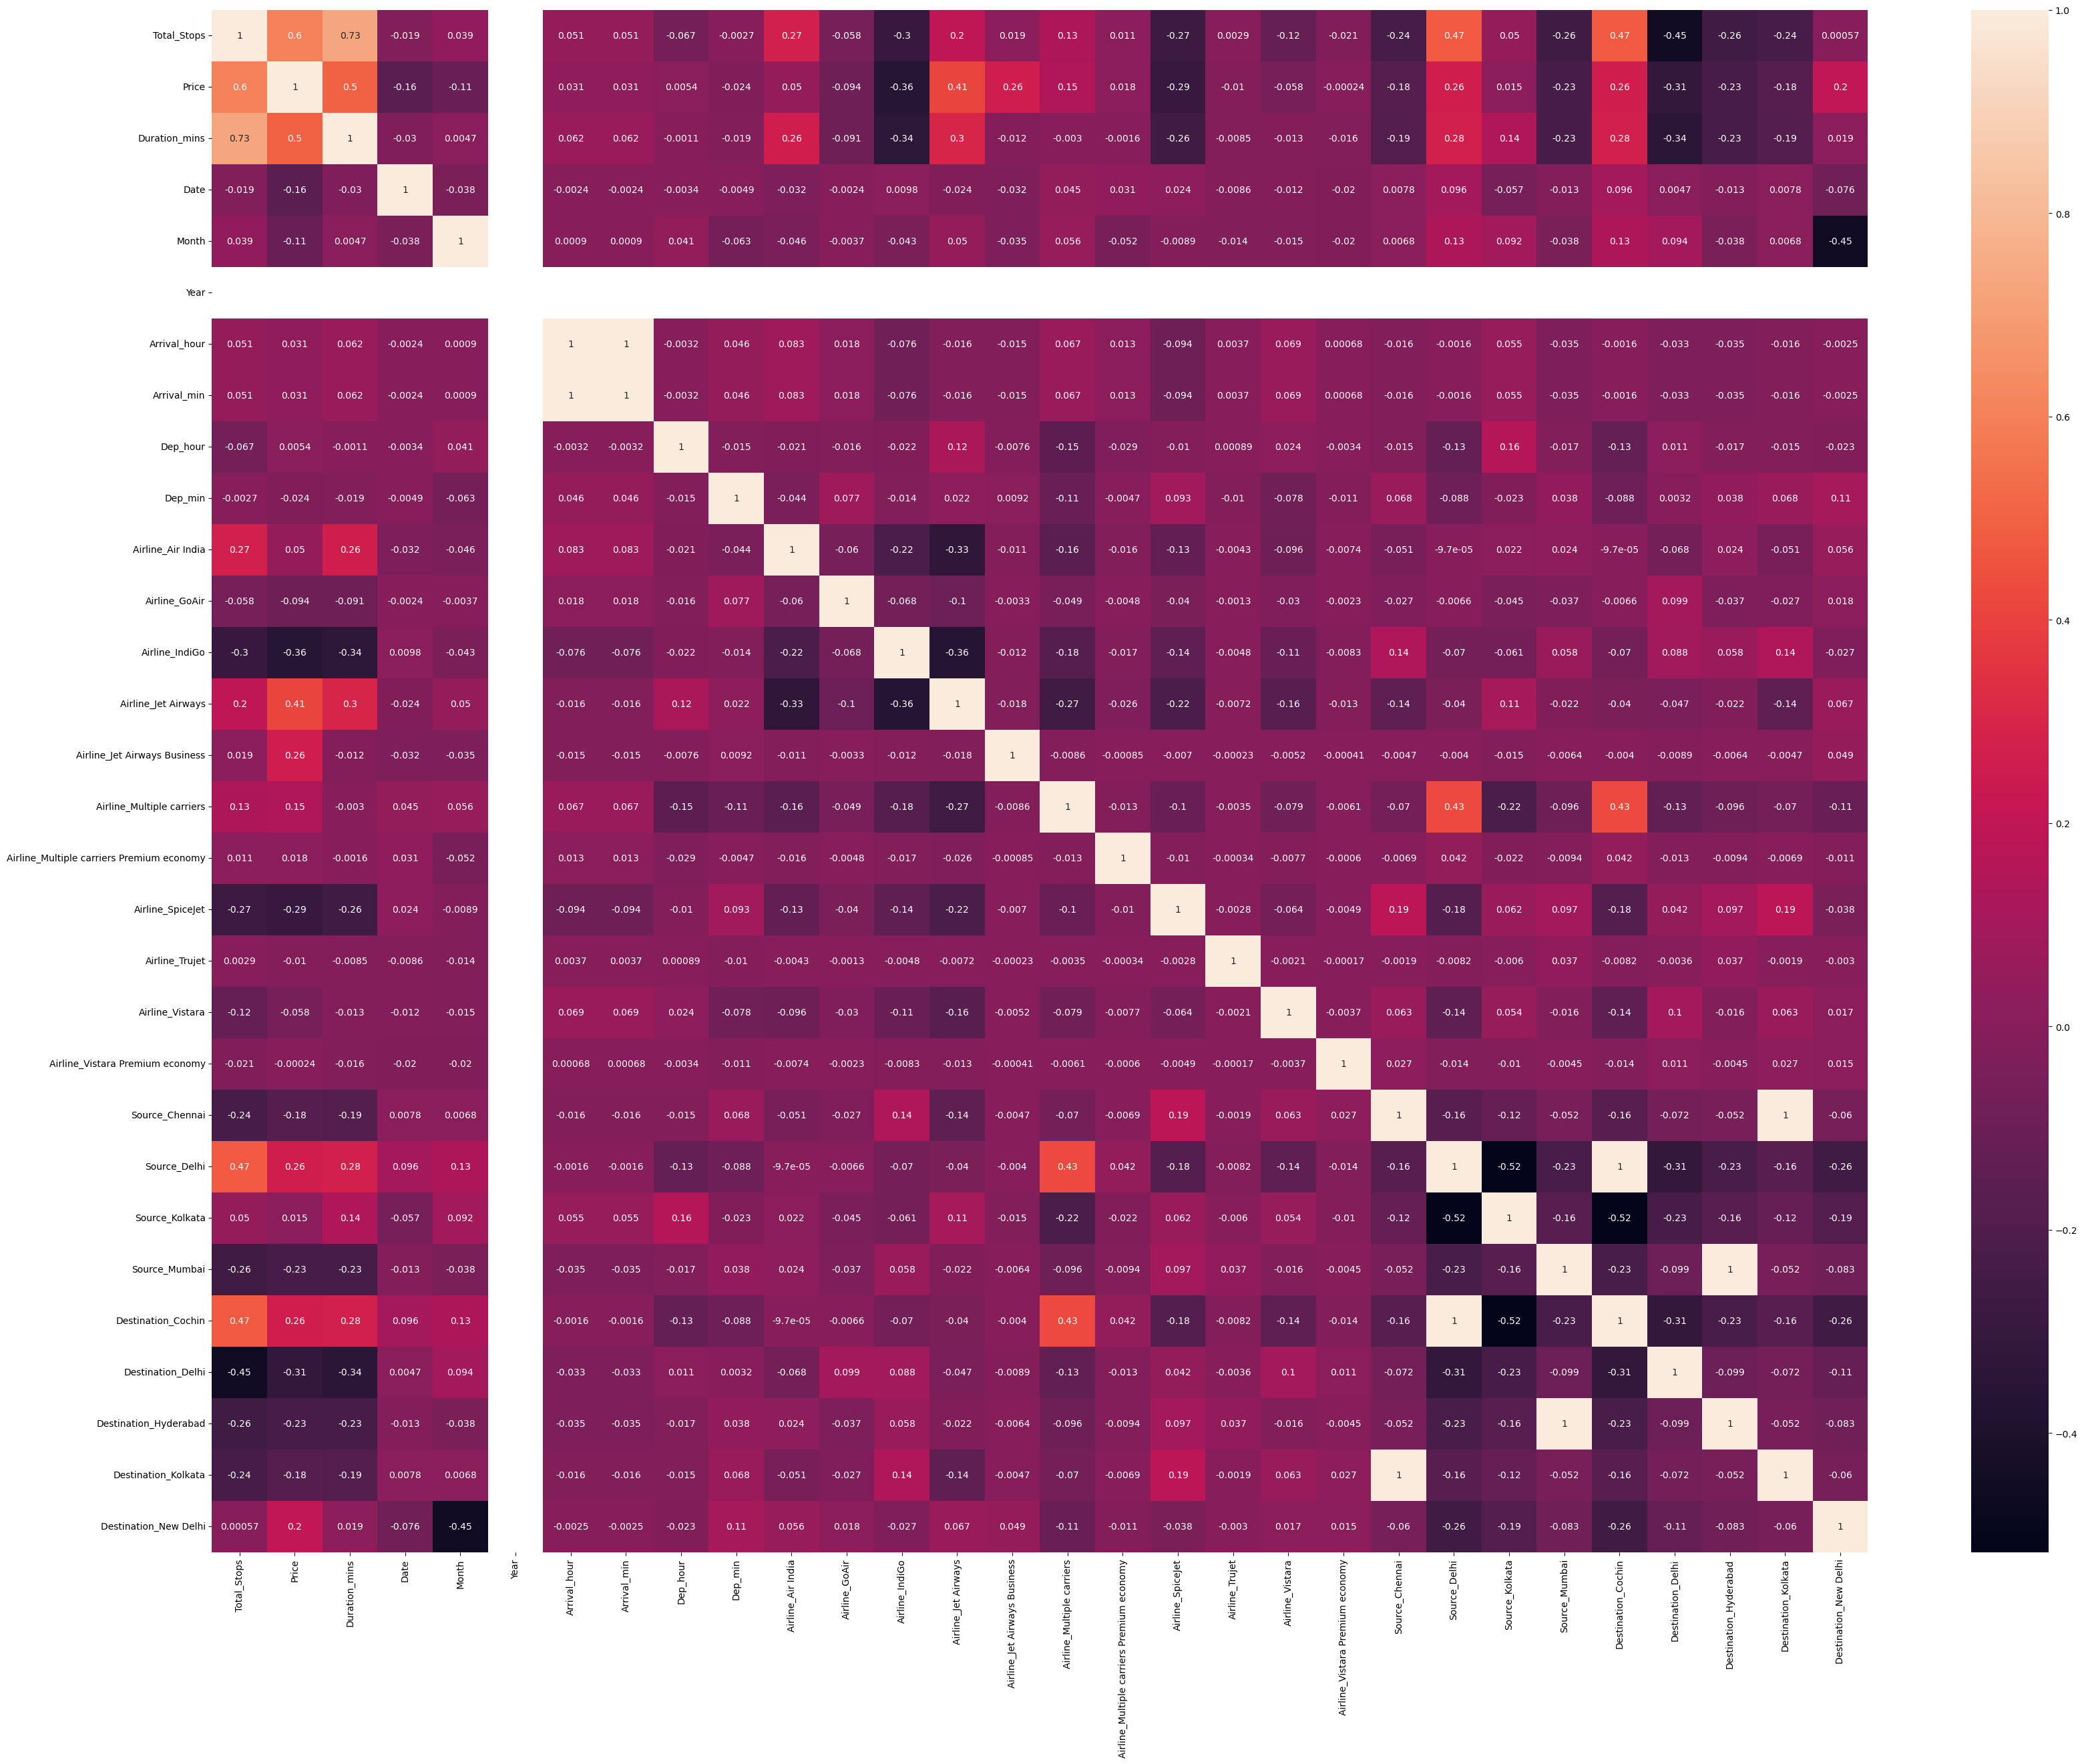

In [55]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(),annot = True)

The Below Columns are highly correlated:
* **Arrival_hour and Arrival_min**
* **Source_chennai and Destination_Kolkata**
* **Destination_Cochin and Source_Delhi**
* **Destination_Hyderabad and Source_Mumbai**
So, We need to drop one of column between them...

In [56]:
data.drop(['Arrival_min','Source_Chennai','Source_Delhi','Source_Mumbai'],inplace=True,axis=1)

In [57]:
# now this dataset is all ready and clean
# now we can start the modelling for this dataset.

In [58]:
x = data.drop('Price',axis=1)    # input variables--> TV,Radio and Newspaper
y = data['Price']      

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=40)

## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)
y_pred

array([ 3074.2320542 ,  4014.39903296,  4875.83646603, ...,
        8911.42081921,  7752.93531034, 10848.67668582])

In [62]:
y_test

6006      3873
1066      5406
5952      4332
5515      6416
10222     4174
         ...  
6588     16704
1698      6953
9640     13611
10382     6938
5079     18371
Name: Price, Length: 3139, dtype: int64

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [64]:
MSE

7268531.974405198

In [65]:
MAE

1935.8007194872425

In [66]:
RMSE

np.float64(2696.0215085205086)

In [67]:
r2_score(y_test,y_pred)

0.6390615021971359

## Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250, random_state=87)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print("R2 Score:", r2_score(y_test, rf_pred))

R2 Score: 0.8369719902767038


In [69]:
data.shape

(10461, 26)

In [70]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100,1500,15)]
max_features = ['log2','sqrt','auto']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [71]:
# create the random grid
random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_features': ['log2', 'sqrt', 'auto'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
# use random grid to search for best hyperparameter tuning
rf_random = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='r2',n_iter = 10,cv=10,verbose=2,random_state=67,n_jobs=1)


In [73]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_esti

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_estimators=250,
                                                   random_state=87),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=67, scoring='r2', verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 1300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [75]:
rf_random.best_score_

np.float64(0.7763505528839593)

In [76]:
rf1 = RandomForestRegressor(n_estimators=1300, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 30)
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1300)

In [77]:
rf1_pred = rf1.predict(x_test)

In [78]:
r2_score(y_test,rf1_pred)

0.8331538458391446

## Decision Tree


In [79]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=96)
DT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=96)

In [80]:
dt_pred = DT.predict(x_test)

In [81]:
print("R2 Score:", r2_score(y_test, dt_pred))

R2 Score: 0.7280461817886206


In [82]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(2, 30)),
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': list(range(1, 20))
}


In [83]:
## use random grid to search for best hyperparameter 
random_search = RandomizedSearchCV(
    DT,
    param_distributions=params,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [84]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=96),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='r2', verbose=2)

In [85]:
random_search.best_score_

np.float64(0.7322387442209843)

In [86]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'min_samples_leaf': 6,
 'max_depth': 15,
 'criterion': 'friedman_mse'}

In [87]:
dt1 = DecisionTreeRegressor(splitter= 'best',min_samples_split =20,min_samples_leaf= 6,max_depth=15,criterion= 'friedman_mse')
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=6, min_samples_split=20)

In [88]:
dt1_pred=dt1.predict(x_test)

In [89]:
r2_score(y_test,dt1_pred)

0.7840305900879337

## XGBoost


In [109]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300,learning_rate=0.01,max_depth=10,subsample=0.8,random_state=69)
xgb.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [110]:
xgb_pred=xgb.predict(x_test)

In [111]:
r2_score(y_test,xgb_pred)

0.8629542589187622

In [112]:
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=xgb_params,
    cv=5,
    n_iter=20,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)


In [113]:
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [114]:
xgb1 = XGBRegressor(subsample= 0.1, n_estimators= 200, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.6)
xgb1.fit(x_train,y_train)
xgb1_pred = xgb1.predict(x_test)

In [116]:
r2_score(y_test,xgb1_pred)

0.825984001159668

## ANN

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ANN Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # IMPORTANT

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=1)

# Predict
ann_pred = model.predict(x_test)
ann_train_pred = model.predict(x_train)

# R2 Score
print("R2 score on testing:", r2_score(y_test, ann_pred))
print("R2 score on training:", r2_score(y_train, ann_train_pred))

Epoch 1/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100920528.0000
Epoch 2/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39278504.0000 
Epoch 3/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11733917.0000 
Epoch 4/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9227191.0000  
Epoch 5/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8589496.0000 
Epoch 6/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8200014.5000  
Epoch 7/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7935303.5000  
Epoch 8/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7735887.5000  
Epoch 9/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7545050.0000    
Epoch 10/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7400182.0000 
Epoch 11/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7266468.5000  
Epoch 12/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7162904.5000    
Epoch 13/200
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7071387.0000
Epoch 14

### KNN

In [123]:
from sklearn.neighbors import KNeighborsRegressor
r2_scores = []

for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    r2_scores.append(r2_score(y_test, pred_i))

r2_scores


[0.657304294290697,
 0.7430449160759365,
 0.7678165545013775,
 0.7765613502866986,
 0.7846453083110555,
 0.7805799924196489,
 0.7709383198199586,
 0.7643566460831315,
 0.7592295989185973]

In [125]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
knn_pred = KNN.predict(x_test)

In [126]:
r2_score(y_test,knn_pred)

0.7846453083110555

In [127]:
results = {
    'Linear Regression': r2_score(y_test,y_pred),
    'KNN': r2_score(y_test,knn_pred),
    'Decision Tree': r2_score(y_test,dt1_pred),
    'ANN Model': r2_score(y_test, ann_pred),
    'Random Forest': r2_score(y_test, rf_pred),
    'XGBoost': r2_score(y_test,xgb_pred)
}
results_df = pd.DataFrame(results.items(),columns=['Model', 'R2 Score'])
results_df

,Model,R2 Score
0,Linear Regression,0.639062
1,KNN,0.784645
2,Decision Tree,0.784031
3,ANN Model,0.798174
4,Random Forest,0.836972
5,XGBoost,0.862954


# Final Conclusion
The Flight Price Prediction project involved evaluating the performance of multiple machine learning algorithms to identify the most effective model for predicting airline ticket prices. Models were trained on historical flight data and assessed using the R² score, which measures how well each model can explain the variance in ticket prices.

**XGBoost** achieved the highest **R² score (0.862954)**, making it the best-performing model in this study. Its ability to handle non-linear interactions, regularization features, and gradient-boosting framework allowed it to learn the underlying structure of flight pricing more effectively than the other models.

## Recommendation

Based on the overall model comparison:

**XGBoost** is the most reliable and accurate model for Flight Price Prediction and is recommended for deployment.
It offers:

* Superior predictive performance

* Robustness to outliers and missing patterns

* Better handling of non-linear and complex feature interactions

* Faster training and improved generalization

                                                            --DONE--